In [1]:
# Importando bibliotecas
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando biblioteca dataset imdb
from tensorflow.keras.datasets import imdb

# Importando biblioteca nltk stopwords
from nltk.corpus import stopwords

# Importando biblioteca rede neural
import keras
import tensorflow as tf

# Importando biblioteca keras tensorflow rede neural
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Carregar o conjunto de dados IMDB
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [3]:
# Vocabulário reverso para mapear índices de palavras para palavras reais
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

In [4]:
# Função para converter uma sequência numérica em texto
def sequence_to_text(sequence):
    return ' '.join([reverse_word_index.get(idx - 3, '?') for idx in sequence])

# Converter as sequências numéricas em texto
sample_text = sequence_to_text(X_train[0])  # Converter a primeira sequência em texto
print(sample_text)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
# Criar um DataFrame para o conjunto de treinamento
train_df = pd.DataFrame({'Review': X_train, 'Sentiment': y_train})

# Criar um DataFrame para o conjunto de teste
test_df = pd.DataFrame({'Review': X_test, 'Sentiment': y_test})

In [6]:
# Acessar os dados de treinamento
X_train_data = train_df['Review']
y_train_data = train_df['Sentiment']

# Acessar os dados de teste
X_test_data = test_df['Review']
y_test_data = test_df['Sentiment']

In [7]:
# Visualizar informações sobre o DataFrame de treinamento
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     25000 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [8]:
# Pré-processamento dos dados
max_review_length = 500

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [9]:
# # Visualizando dados teste
X_train.shape

(25000, 500)

In [10]:
# Visualizando dados treino
X_test.shape

(25000, 500)

# **Rede Neural**

**Rede neural LSTM 1 - Simples**

In [11]:
# Definir a arquitetura da rede neural LSTM
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_review_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
epochs = 30

# Summario modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Treinar o modelo
model_lstm = model.fit(X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       batch_size=batch_size,
                       epochs=epochs)

Epoch 1/30
391/391 [==============================] - 49s 88ms/step - loss: 0.4355 - accuracy: 0.7898 - val_loss: 0.3348 - val_accuracy: 0.8607
Epoch 2/30
391/391 [==============================] - 35s 91ms/step - loss: 0.2669 - accuracy: 0.8939 - val_loss: 0.3551 - val_accuracy: 0.8550
Epoch 3/30
391/391 [==============================] - 35s 88ms/step - loss: 0.2211 - accuracy: 0.9160 - val_loss: 0.3317 - val_accuracy: 0.8640
Epoch 4/30
391/391 [==============================] - 34s 88ms/step - loss: 0.1556 - accuracy: 0.9440 - val_loss: 0.3702 - val_accuracy: 0.8668
Epoch 5/30
391/391 [==============================] - 35s 89ms/step - loss: 0.1102 - accuracy: 0.9608 - val_loss: 0.3998 - val_accuracy: 0.8615
Epoch 6/30
391/391 [==============================] - 34s 88ms/step - loss: 0.0957 - accuracy: 0.9667 - val_loss: 0.4829 - val_accuracy: 0.8568
Epoch 7/30
391/391 [==============================] - 34s 88ms/step - loss: 0.2028 - accuracy: 0.9128 - val_loss: 0.4655 - val_accuracy:

In [13]:
# Extrair as métricas de treinamento
train_loss = model_lstm.history['loss']
val_loss = model_lstm.history['val_loss']

train_accuracy = model_lstm.history['accuracy']
val_accuracy = model_lstm.history['val_accuracy']

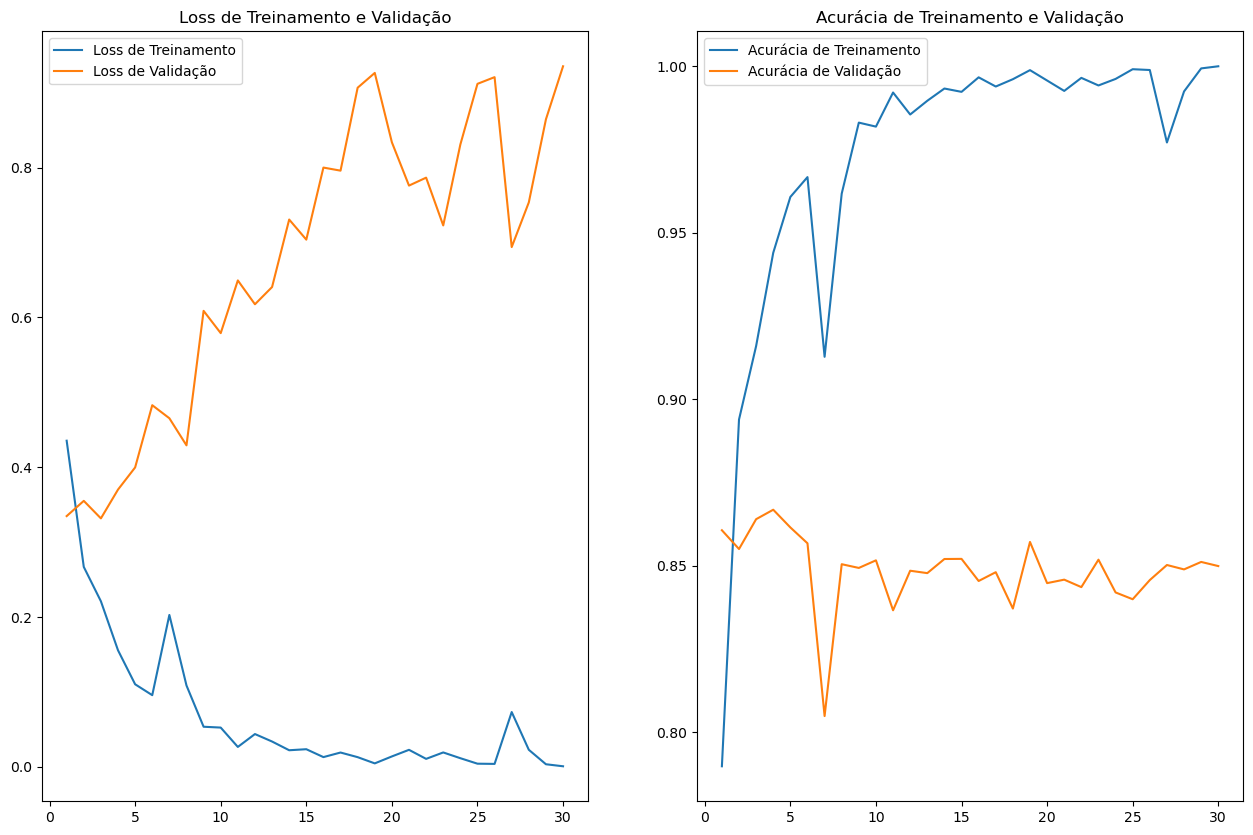

In [14]:
# Plotar as métricas
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(15.5, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Loss de Treinamento')
plt.plot(epochs_range, val_loss, label='Loss de Validação')
plt.legend()
plt.title('Loss de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_accuracy, label='Acurácia de Validação')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.show()

In [15]:
# Avaliar o modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Acurácia Rede neural LSTM: %.2f%%" % (scores[1] * 100))

Acurácia Rede neural LSTM: 84.99%


In [16]:
# Fazer previsões
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

782/782 [==============================] - 19s 24ms/step


In [17]:
# Imprimir relatório de classificação
print("Relatório de Classificação - Rede neural LSTM:")
print(classification_report(y_test, y_pred))

Relatório de Classificação - Rede neural LSTM:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [18]:
# Criar a matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix - Rede Neural LSTM \n\n', confusion)
print('\nVerdadeiro Positivo(TP) = ', confusion[0,0])
print('\nVerdadeiro Negativo(TN) = ', confusion[1,1])
print('\nFalso Positivo(FP) = ', confusion[0,1])
print('\nFalso Negativo(FN) = ', confusion[1,0])

Confusion matrix - Rede Neural LSTM 

 [[10589  1911]
 [ 1841 10659]]

Verdadeiro Positivo(TP) =  10589

Verdadeiro Negativo(TN) =  10659

Falso Positivo(FP) =  1911

Falso Negativo(FN) =  1841


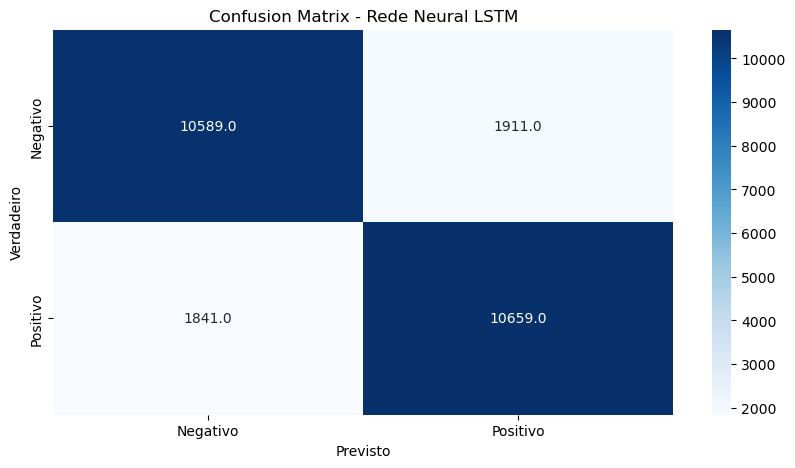

In [19]:
# Plot matriz confussão 
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt = ".1f", cmap="Blues"); 
ax.set_title('Confusion Matrix - Rede Neural LSTM'); 
ax.xaxis.set_ticklabels(["Negativo", "Positivo"]); ax.yaxis.set_ticklabels(["Negativo", "Positivo"]);
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Salvando modelo 

In [20]:
# Salvando rede neural 
from tensorflow.keras.models import save_model

# Salvar o modelo treinado em um arquivo
# 'modelo.h5' é o nome do arquivo onde o modelo será salvo
model.save('modelo_sentiment_IMDB.h5')

# Conclusão

# Referência